# Bootcamp Project - Product Recommendation

Our customer is a multi-national company that works on the health sector. They want to predict what products their
customers shall need the most, based on their past purchases but also on other variables that could be interesting
(this would be part of your research).

**Goal:** Build a recommendation engine to recommend relevant items to a user, based on historical data.

<a id='toc'></a>

### Table of Contents
1. [Recommendation engine datasets exploration and cleaning](#dataset) <br>
    1. [Dataset overview](#dataset_overview) <br>
    2. [Additional dataset information](#dataset_additional_information) <br>
    3. [Dataset exploration and evaluation](#dataset_exploration) <br>
       1. [Import required modules](#module_import) <br>
       2. [Import datasets](#dataset_import) <br>
       3. [General dataset overview](#general_dataset_overview) <br>
       4. [Initial datasets cleaning](#initial_dataset_cleaning) <br>
       5. [Full dataset exploration](#full_dataset_exploration) <br>
       6. [Full datasets cleaning](#full_dataset_exploration) <br>
       7. [Full dataset visual exploration](#full_dataset_visual_exploration) <br>
       8. [Final dataset preparation](#final_dataset_preparation) <br>

<a name='dataset'></a>

## 1. Recommendation engine datasets exploration and cleaning
The first step to build a recommendation system was to explore and evaluate the dataset that was given to us by the
company.<br>
The dataset consisted on a stock.csv with information about the product sales and a product_master.csv with information
regarding the product hierarchical structure. One importante point is that due to data restrictions, the company was
not allowed to share the real dataset and so a fictional dataset that tries to recreate the real one was created and
shared.

<a name='dataset_overview'></a>

### 1.1. Dataset overview
Each of the datasets has different features giving different information.

**Stock Dataset**: <br>
Stock.csv - transactional information about sales of products:

* *country_code* – Code of the country
* *cac* – customer
* *product_code* – product sold
* *month_code* – year and month of the sale
* *invoiced_sales* - sales
* *volume_primary_units* – number of sold units
* *inventory_cost* – cost of the product for the company (unitary cost multiplied by volume)
<br><br>

**Product Dataset**:<br>
Product_master.csv – To complement the file above with more details about  the product.

* *bravo_ww_fran_name* – company designation for the global group
* *bravo_fran_name* – company designation for a region of the group
* *bravo_sub_fran_name* – company area
* *bravo_major_name* – product family
* *bravo_minor_name* – product sub-family
* *product_code* – product code

<a name='dataset_additional_information'></a>

### 1.2. Additional dataset information
Besides, the stock and product_master datasets additional information was given regarding the feaures.

**Stock Dataset:**

`Features`
* *country_code* - country where the sale is being made.
* *month_code* - dates referred as *1900* are open orders, no sales date yet.
* *inventory_cost* - production costs.
* *inventory_cost* - the inventory costs are also multiplied by the quantity (*volume_primary_units*).
* *volume_primary_units* - decimal numbers are possible since some products are sold in liters.
<br><br>

`Feature interactions`
1. If sales *inventory_cost*, *volume_primary_units* and *invoiced_sales* are zero there is no information available
   about the orders, and they can be removed.
2. When *invoiced_sales* is negative and *volume_primary_units* is positive we have a comercial agreement with the
   client leading to a compensation due to delay or stock rupture.
3. When *invoiced_sales* is negative and *volume_primary_units* is negative we have a product and credit return.
4. When *invoiced_sales* is negative and *volume_primary_units* is zero we have a credit return without product return.


<a name='dataset_exploration'></a>

###  1.3. Dataset cleaning, exploration and evaluation
In this section we performed all the required evaluations of the datasets and using the gained insights performed a
cleaning process.

<a name='module_import'></a>

#### 1.3.1. Import required modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# import the created packages for this project
from bootcamp.data import SalesData, ProductData, FullData

/Users/olivefab/.pyenv/versions/bootcamp2/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<a name='dataset_import'></a>

#### 1.3.2. Import datasets

In [2]:
stock = SalesData("../../data/raw_datasets/stock.csv")
product = ProductData("../../data/raw_datasets/product_master.csv")

product_dataset = product._load_raw_data()
stock_dataset = stock._load_raw_data()

12/09/2021 16:46:09 - INFO: Loading raw data...
12/09/2021 16:46:09 - INFO: Loading raw data...


<a name='general_dataset_overview'></a>

#### 1.3.3. General dataset overview
In this section we perform a first general exploration of the dataset, to better understand the type of data we have.
We also perform a basic cleaning and prepare the datasets for the next exploration phases.

`Dataset visualization`

In [3]:
product_dataset.head()

,bravo_ww_fran_name,bravo_fran_name,bravo_sub_fran_name,bravo_major_name,bravo_minor_name,product_code
0,bravo_ww_fran_name_0,bravo_fran_name_0,bravo_sub_fran_name_0,bravo_major_name_0,bravo_minor_name_0,product_code_0
1,bravo_ww_fran_name_1,bravo_fran_name_1,bravo_sub_fran_name_1,bravo_major_name_1,bravo_minor_name_1,product_code_1
2,bravo_ww_fran_name_2,bravo_fran_name_2,bravo_sub_fran_name_2,bravo_major_name_2,bravo_minor_name_2,product_code_2
3,bravo_ww_fran_name_2,bravo_fran_name_2,bravo_sub_fran_name_2,bravo_major_name_2,bravo_minor_name_2,product_code_3
4,bravo_ww_fran_name_0,bravo_fran_name_0,bravo_sub_fran_name_0,bravo_major_name_0,bravo_minor_name_0,product_code_4


* All the product names and hierarchy are organized in this file.
* We have a lot of repetition in the family and product names that could be simplified if we only kept the number ids.
* Feature names are not intuitive and should be uniformized.

In [4]:
stock_dataset.head()

,country_code,cac,product_code,month_code,invoiced_sales,volume_primary_units,inventory_cost
0,country_code_0,cac_0,product_code_0,190001.0,0,0,0
1,country_code_0,cac_0,product_code_1,190001.0,0,0,0
2,country_code_0,cac_0,product_code_2,190001.0,0,0,0
3,country_code_0,cac_0,product_code_3,190001.0,0,0,0
4,country_code_0,cac_0,product_code_4,190001.0,0,0,0


* Similarly to the product dataset we can remove a lot name repetition by keeping only the ids (*country_code*, *cac*
* and *product_code*)
* *month_code* seems to be a float that needs to be changed to date
* Feature names are not intuitive and should be uniformized

`Dataset structure`

In [5]:
product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24693 entries, 0 to 24692
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bravo_ww_fran_name   24693 non-null  object
 1   bravo_fran_name      24693 non-null  object
 2   bravo_sub_fran_name  24693 non-null  object
 3   bravo_major_name     24693 non-null  object
 4   bravo_minor_name     24693 non-null  object
 5   product_code         24693 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


* All the features are strings as expected
* It seems that we have approximately 25 thousand products

In [6]:
stock_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199686 entries, 0 to 5199685
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   country_code          object 
 1   cac                   object 
 2   product_code          object 
 3   month_code            float64
 4   invoiced_sales        object 
 5   volume_primary_units  object 
 6   inventory_cost        object 
dtypes: float64(1), object(6)
memory usage: 277.7+ MB


* We confirm that *month_code* is actually a float
* Also, *invoiced_sales*, *volume_primary_units* and *inventory_cost* are strings and should be corrected to floats
* We have information regarding approximately 5.2 million sales

`Duplicated entries`

In [7]:
product_dataset.duplicated().sum()

0

* We have no duplicated entries in the product dataset

In [8]:
stock_dataset.duplicated().sum()

0

* We have no duplicated entries in the stock dataset

`Missing values`

In [9]:
product_dataset.isna().sum()

bravo_ww_fran_name     0
bravo_fran_name        0
bravo_sub_fran_name    0
bravo_major_name       0
bravo_minor_name       0
product_code           0
dtype: int64

* We have no missing values in the product dataset

In [10]:
stock_dataset.isna().sum()

country_code            0
cac                     0
product_code            0
month_code              1
invoiced_sales          1
volume_primary_units    1
inventory_cost          1
dtype: int64

* We have a very small number of missing values that need to be removed

`Unique values of relevant features`

In [11]:
product_dataset.nunique()

bravo_ww_fran_name         9
bravo_fran_name           32
bravo_sub_fran_name       40
bravo_major_name         111
bravo_minor_name         414
product_code           24693
dtype: int64

* We have 24.693 unique products
* There is a clear hierarchy of the products
* There is a great increase from the last product group to the products itself. Are the products evenly distributed or
  are there specific groups with a large number of products.

In [12]:
stock_dataset[['country_code', 'cac', 'product_code']].nunique()

country_code        4
cac             10032
product_code    57986
dtype: int64

* We seem to have more products in this dataset that in the product dataset, which might indicate that we have products
  that don't have hierarchy information.
* We have 4 countries and 10.032 clients

`Product distribution per family`

In [13]:
product_dataset.groupby('bravo_minor_name').agg(unique_product_code = ('product_code', 'nunique')).describe()

,unique_product_code
count,414.000000
mean,59.644928
std,277.700227
min,1.000000
25%,2.000000
50%,5.000000
75%,21.500000
max,4642.000000


* The distribution of products per family (*bravo_minor_name*) is right skewed, with some families with approximately
  5 thousand products and other with only one product
* Might represent a problem that need to be addressed when constructing the recommender system

`Products without family`
In this section we try to explore what are the main products that are sold that don't have family information.

In [14]:
products_without_family_info = (
    stock_dataset
    .groupby('product_code')
    .agg(n = ('product_code', np.size))
    .merge(product_dataset, on = ['product_code'], how = 'outer')
    .query('bravo_minor_name.isna()')
    [['product_code', 'n']]
    .sort_values(by='n', ascending=False)
)
products_without_family_info

,product_code,n
17457,product_code_25709,397
17186,product_code_25465,377
16843,product_code_25156,329
19234,product_code_27308,322
20337,product_code_28300,315
...,...,...
43475,product_code_49125,1
43476,product_code_49126,1
43477,product_code_49127,1
43481,product_code_49130,1


In [15]:
sales_products_without_family = products_without_family_info.n.sum()
print(f"Number of sales of products without family information: {sales_products_without_family}")

Number of sales of products without family information: 349262


In [16]:
per_sales_products_without_family = round(products_without_family_info.n.sum()/len(stock_dataset) * 100, 2)
print(f"Percentage of sales of products without family information: {per_sales_products_without_family} %")

Percentage of sales of products without family information: 6.72 %


* There are 33.293 products without family information that need to be treated, since we don't have any extra
  information.
* These products represent 349.262 sales (6,72 % of the total sales) indicating a great data quality problem.
* Although these products represent a big portion of the data we currently have no way of knowing if these products are
real or errors. For these reason we opted to remove them.

**General overview main points:**
1. A large portion of products representing 6,72 % of total sales doesn't have family information.
2. The distribution of products per product families is right skewed.
3. We have information regarding 5 million sales of approximately 58 thousand products that are sold to 10 thousand
clients across 4 counties.
4. Sale dates need to be cleaned.
5. There are some missing values that need to be removed.
6. Categorical features need to be converted to ids.
7. *invoiced_sales*, *volume_primary_units* and *inventory_cost* need to be converted do floats.
8. Columns need to be renamed.
9. Products with no family information will be removed.

<a name='initial_dataset_cleaning'></a>

#### 1.3.4. Initial datasets cleaning
In this section we perform an initial cleaning of the datasets based on the general datasets exploration, with the
objective of preparing the datasets to more complex evaluations and visualizations.


`Cleaning the stock and product datasets`

In [17]:
stock = SalesData("../../data/raw_datasets/stock.csv")
product = ProductData("../../data/raw_datasets/product_master.csv")

clean_stock_dataset = stock.run()
clean_product_dataset = product.run()

12/09/2021 16:46:25 - INFO: Loading raw data...
12/09/2021 16:46:32 - INFO: Renaming columns...
12/09/2021 16:46:33 - INFO: Getting ids...
12/09/2021 16:47:04 - INFO: Converting values to numeric...
12/09/2021 16:47:35 - INFO: Removing missing values...
12/09/2021 16:47:37 - INFO: Converting dates to date...
12/09/2021 16:47:37 - INFO: Loading raw data...
12/09/2021 16:47:37 - INFO: Renaming columns...
12/09/2021 16:47:37 - INFO: Getting ids...
12/09/2021 16:47:38 - INFO: Removing missing values...


`Preparing the full dataset`

In [18]:
full_dataset = (
    clean_stock_dataset
    .merge(clean_product_dataset, on=['ProductID'], how='outer')
    .dropna()
)

<a name='full_dataset_exploration'></a>

#### 1.3.5. Full dataset exploration
In this section we perform a more complete exploration of the full dataset after it has been cleaned. By doing the
initial cleaning we can now explore the dataset to it's full extent.

`Full dataset visualization`

In [19]:
full_dataset.head().T

,0,1,2,3,4
Country,0,0,0,0,0
Client,0,161,496,993,1995
ProductID,0,0,0,0,0
Date,1900-01-01 00:00:00,2019-07-01 00:00:00,2018-05-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00
InvoiceSales,0.0,74.45,0.0,0.0,0.0
VolumeUnits,0.0,1.0,2.0,1.0,1.0
InventoryCost,0.0,103.47,188.9,94.45,94.45
CompanyGlobalGroup,0,0,0,0,0
CompanyRegionalGroup,0,0,0,0,0
CompanyArea,0,0,0,0,0


* All the features seem to have the correct type and expected structure.

`Full dataset structure`

In [20]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850424 entries, 0 to 4850423
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Country               object        
 1   Client                object        
 2   ProductID             object        
 3   Date                  datetime64[ns]
 4   InvoiceSales          float64       
 5   VolumeUnits           float64       
 6   InventoryCost         float64       
 7   CompanyGlobalGroup    object        
 8   CompanyRegionalGroup  object        
 9   CompanyArea           object        
 10  ProductCategory       object        
 11  ProductSubCategory    object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 481.1+ MB


* We confirm that all the features have the correct type

`Full dataset numeric feature general evaluation`

In [21]:
full_dataset.describe()

,InvoiceSales,VolumeUnits,InventoryCost
count,4.850424e+06,4.850424e+06,4.850424e+06
mean,4.853402e+02,2.739721e+01,1.327730e+02
std,1.781583e+03,1.693938e+02,5.403254e+02
min,-3.990631e+05,-6.440000e+03,-4.804762e+04
25%,3.516000e+01,1.000000e+00,1.141000e+01
50%,1.415400e+02,2.000000e+00,4.162000e+01
75%,4.243200e+02,1.200000e+01,1.184500e+02
max,3.708568e+05,1.038000e+05,3.291600e+05


* When giving more information about the datasets the company referred to cases where only the *InvoiceSales* and
*VolumeUnits* had negative values. However, we can see that we also have negative *InventoryCost*.
* For these reason we need to evaluate what type of combinations between *InvoicedSales*, *VolumeUnits* and
*InventoryCost* exist, since not all possible combinations were explained initially.
* All the features are right skewed, with a small number of big purchases and a big number of small ones.

`Full dataset numeric combinations` <br>
Evaluation and counting of the combinations (>0, <0 and =0) between the numeric variables.

In [22]:
# create a copy of the dataset
combination_counting = full_dataset.copy()

# define the columns to evaluate
columns = ['InvoiceSales', 'VolumeUnits', 'InventoryCost']

# create a categorical column for each of the columns
for column in columns:
    combination_counting[f'{column}Categories'] = '>0'
    combination_counting.loc[combination_counting[column] < 0, f'{column}Categories'] = '<0'
    combination_counting.loc[combination_counting[column] == 0, f'{column}Categories'] = '=0'

# perform the combination counting evaluation
(
    combination_counting
    .groupby(['InvoiceSalesCategories', 'VolumeUnitsCategories', 'InventoryCostCategories'])
    .agg(n = ('Client', np.size))
    .sort_values(by = 'n', ascending = False)
    .assign(percentage = lambda x: round(x['n']/sum(x['n']) * 100, 2))
    .reset_index()
    .reset_index(drop = True)
)

,InvoiceSalesCategories,VolumeUnitsCategories,InventoryCostCategories,n,percentage
0,>0,>0,>0,4050098,83.50
1,=0,=0,=0,570066,11.75
2,=0,>0,>0,73460,1.51
3,<0,<0,<0,64136,1.32
4,>0,>0,=0,38604,0.80
5,<0,=0,=0,30194,0.62
6,>0,=0,=0,9263,0.19
7,=0,>0,=0,6630,0.14
8,=0,<0,<0,5481,0.11
9,<0,>0,>0,2045,0.04


* We have 15 different types of combinations that need to evaluated and labeled

|Case|InvoiceSales|VolumeUnits|InventoryCost|Observations|Label|
|----|------------|-----------|-------------|------------|-----|
|0	|>0	|>0	|>0|Normal sale.|Normal|
|1	|=0	|=0	|=0|According to the company these values should be removed.|No info|
|2	|=0	|>0	|>0|No *InvoiceSales* but, positive *VolumeUnits* and *InventoryCost*.|Product giveaway|
|3	|<0	|<0	|<0|All values are negative, so it is a product and credit return.|Product and credit return|
|4	|>0	|>0	|=0|Might represent a service that is charged to the client.|Services|
|5	|<0	|=0	|=0|*InvoiceSales* negative and remaining features equal to zero.|Credit return|
|6	|>0	|=0	|=0|Only *InvoiceSales* has a positive value. Seems like a price correction.|Price correction|
|7	|=0	|>0	|=0|We have a positive value for *VolumeUnits* but zero on the other features. Hard to explain.|Error|
|8	|=0	|<0	|<0|Seems that it is a product return since there is no *InvoiceSales* value|Product return|
|9	|<0	|>0	|>0|Comercial agreement with the client leading to a compensation due to delay or stock rupture.|Client compensation|
|10	|>0	|<0	|<0|Has a low percentage an it is difficult to explain, so we will assume it as an error.|Error|
|11	|<0	|<0	|=0|Has a low percentage an it is difficult to explain, so we will assume it as an error.|Error|
|12	|<0	|>0	|=0|Has a low percentage an it is difficult to explain, so we will assume it as an error.|Error|
|13	|=0	|<0	|=0|Has a low percentage an it is difficult to explain, so we will assume it as an error.|Error|
|14	|>0	|<0	|=0|Has a low percentage an it is difficult to explain, so we will assume it as an error.|Error|

`Full dataset categorical feature general evaluation`

In [23]:
full_dataset.describe(include = 'O')

,Country,Client,ProductID,CompanyGlobalGroup,CompanyRegionalGroup,CompanyArea,ProductCategory,ProductSubCategory
count,4850424,4850424,4850424,4850424,4850424,4850424,4850424,4850424
unique,4,9645,24693,9,32,40,111,414
top,2,6876,128,3,13,5,5,3
freq,1812225,24195,9667,3530633,1081701,915003,915003,851263


* We have 4 countries, and the one with most sales is 2.
* We have 9645 clients and 24.693 products.
* The client with most purchases is 6876.
* The product with most sales is 128.

`Number of countries per client` <br>
We want to evaluate if each client buys in a single country or if we have clients that are present in many countries.

In [24]:
full_dataset.groupby('Client').agg(NumberCountries = ('Country', 'nunique')).value_counts()

NumberCountries
1                  9645
dtype: int64

* All the clients make purchases in a single country.

`Number of products per client` <br>
We want to evaluate how many products each client purchases.

In [25]:
(
    full_dataset
    .groupby('Client')
    .agg(NumberProducts = ('ProductID', 'nunique'))
    .describe()
)

,NumberProducts
count,9645.000000
mean,144.459202
std,311.866368
min,1.000000
25%,2.000000
50%,9.000000
75%,129.000000
max,4534.000000


In [26]:
clients_with_less_than_five_products = len(
    full_dataset
    .groupby('Client')
    .agg(NumberProducts = ('ProductID', 'nunique'))
    .query("NumberProducts <= 9")
)

number_of_clients = len(
    full_dataset
    .groupby('Client')
    .agg(NumberProducts = ('ProductID', 'nunique'))
)

round(clients_with_less_than_five_products / number_of_clients * 100, 2)

50.74

* The number of products bought by each client is right skewed has can be seen. 50 % of the clients buy 9 or less
products.
* Some exceptions exist like a client that bought 4534 products.

`Number of sales per month`

In [27]:
(
    full_dataset.groupby('Date')
    .agg(n = ('Date', np.size))
    .sort_values(by = 'n', ascending = False)
    .assign(percentage = lambda x: round(x['n']/sum(x['n']) * 100, 2))
)

,n,percentage
Date,,
2018-03-01,288911,5.96
1900-01-01,286125,5.90
2018-06-01,280055,5.77
2018-12-01,276525,5.70
2019-03-01,274397,5.66
2018-09-01,272072,5.61
2019-06-01,269135,5.55
2018-11-01,247114,5.09
2018-07-01,235977,4.87


* We have sales data from 2018-01 until 2019-07.
* Sales with the date of 1900-01-01 represent the biggest share of sales. Since they represent open sales we can
assume that the client has interest in the product (so it can be used for our recommendation engine).
* Regarding the open orders we can also make the assumption that they will be closed next month (2019-08), giving a more
workable date to the next phases.

**Full dataset exploration main points:**
1. We have multiple combinations of *InvoiceSales*, *VolumeUnits* and *InventoryCost*. Some combinations are explained 
by the company, however, there are many that are not and others that seem like errors. For these reason all the sales
should be labeled and addressed according to the taken conclusions.
2. Open sales should be considered and the date corrected using the next month (2019-08).
3. Most of the clients buy a low number of products.
4. All clients make purchases in a single country.

<a name='full_dataset_cleaning'></a>

#### 1.3.6. Full datasets cleaning

`Cleaning the full dataset`

In [28]:
full = FullData(clean_stock_dataset, clean_product_dataset, perform_final_cleaning = False)

clean_full_dataset = full.run()

12/09/2021 16:48:13 - INFO: Merging both datasets...
12/09/2021 16:48:19 - INFO: Removing missing values...
12/09/2021 16:48:26 - INFO: Labeling sales...
12/09/2021 16:48:35 - INFO: Correcting open sales date...


<a name='full_dataset_visual_exploration'></a>

#### 1.3.7. Full dataset visual exploration
In this section we perform several visual evaluations of the clean full dataset. 

`Sales distribution over time`

In [29]:
sales_labels_per_month = (
    clean_full_dataset
    .groupby(['Date', 'SalesLabel'])
    .agg(n = ('Date', np.size))
    .reset_index()
    .pivot_table(index = 'Date', columns = 'SalesLabel', values = 'n', aggfunc = np.sum, fill_value = 0)
)

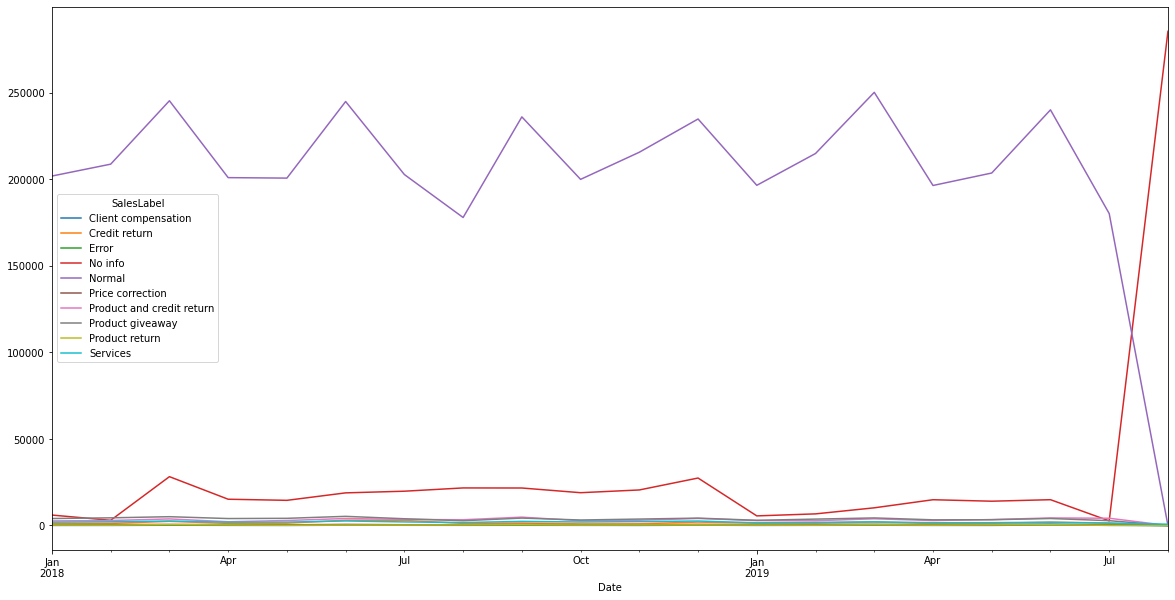

In [30]:
sales_labels_per_month.plot(figsize=(20, 10));

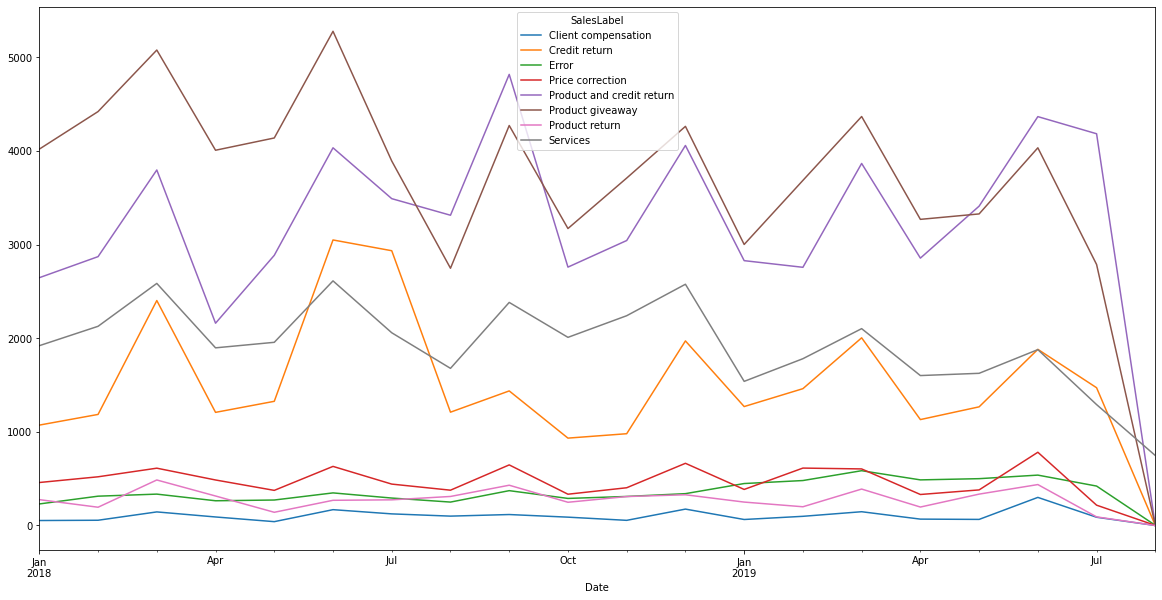

In [31]:
sales_labels_per_month.drop(columns = ['Normal', 'No info']).plot(figsize=(20, 10));

* Most of the sales that we corrected the date (1900-01) have a *No info* label, so it seems that is of no need to keep
this type of sales.
* Has expected most of the sales are *Normal* sales.
* There seems to exist a seasonality in the sales.
* *Credit return*, *Product giveaway*, *Product and credit return* seem to follow the sales seasonality.

`Evaluation of the last purchase date of clients with a low numeber of purchases (<4)`

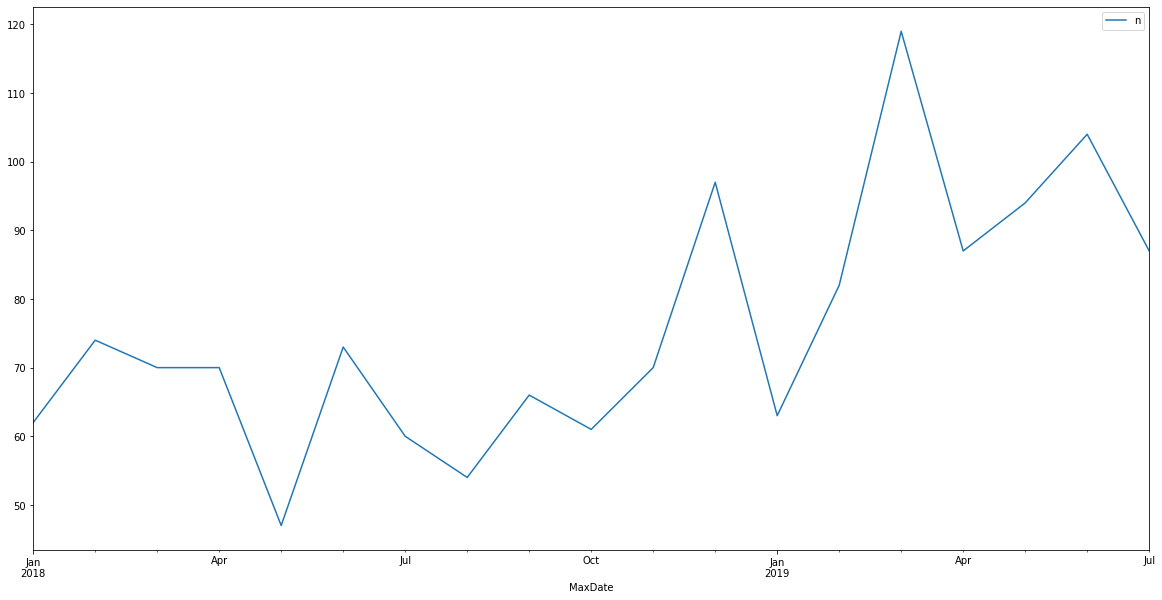

In [32]:
# get clients with lower purhcase number
clients_with_low_number_of_purchases = (
    clean_full_dataset
    .groupby('Client')
    .agg(n = ('Client', np.size))
    .query('n < 4')
    .index
)

# last purchase date per client
last_date_with_purchase = (
    clean_full_dataset
    .loc[clean_full_dataset['Client'].isin(clients_with_low_number_of_purchases)]
    .groupby('Client')
    .agg(MaxDate = ('Date', np.max))
    .groupby('MaxDate')
    .agg(n = ('MaxDate', np.size))
    .drop('2019-08-01')
)

last_date_with_purchase.plot(figsize=(20, 10));

* It seems like the last purchase for these type of clients tends to occur at the peak of sales. This might happen due
to two things:
    * Stock ruptures that lead to angry clients
    * Clients that only purchase in peak demands

`InvoiceSales distribution`<br>

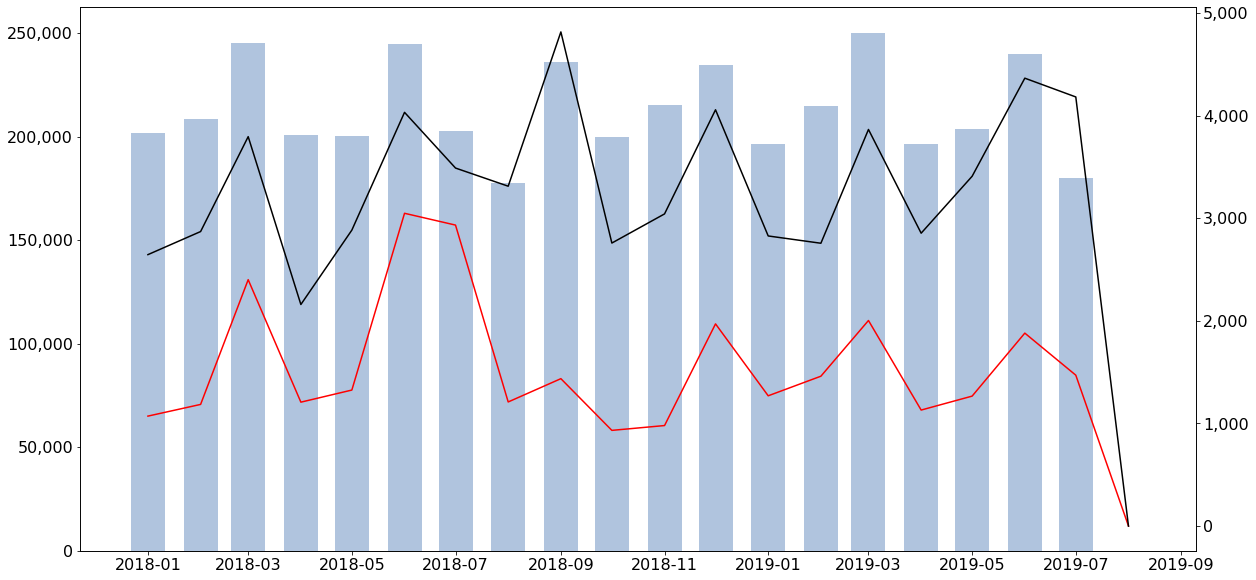

In [33]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)

ax1.bar(sales_labels_per_month.index, sales_labels_per_month['Normal'], width=20, color="lightsteelblue")

ax2 = ax1.twinx()

ax2.plot(sales_labels_per_month['Credit return'], color='r')
ax2.plot(sales_labels_per_month['Product and credit return'], color='k')

ax2.grid(False)

ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

`InvoiceSales distribution`<br>
For this evaluation we focus only on the normal sales since they are the major part of the sales and the ones that
better describe the client purchase behaviour.

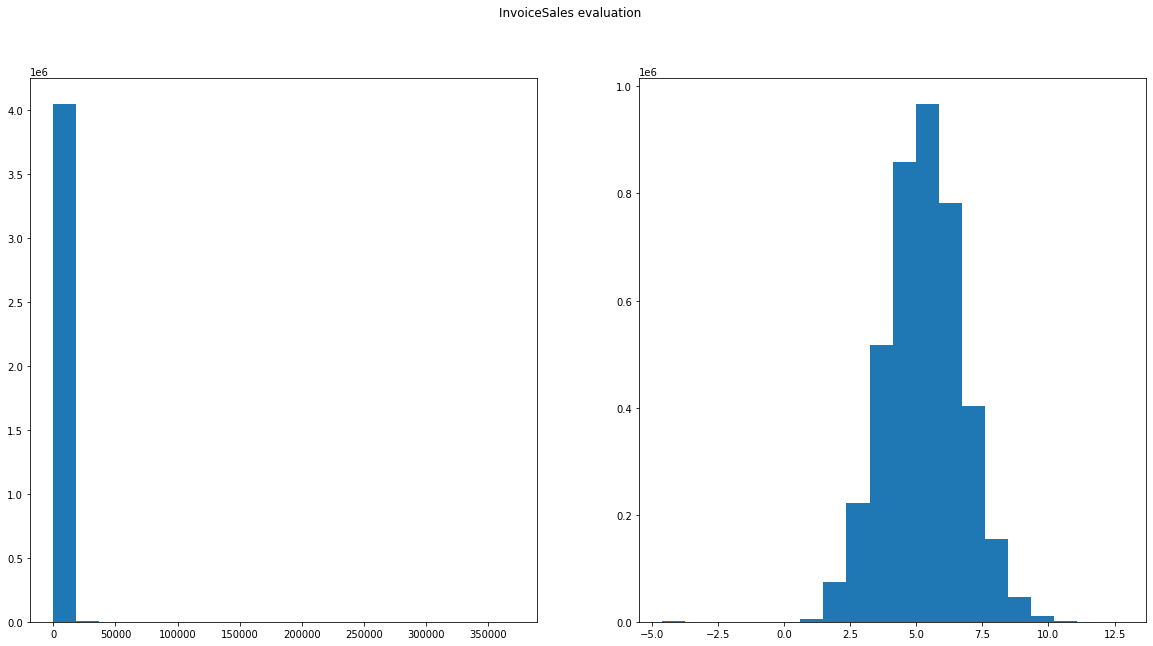

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10));
fig.suptitle('InvoiceSales evaluation');
ax1.hist(clean_full_dataset.query('SalesLabel == "Normal"')['InvoiceSales'], bins=20);
ax2.hist(np.log(clean_full_dataset.query('SalesLabel == "Normal"')['InvoiceSales']), bins=20);

* *InvoiceSales* is right skewed, however when normalized using the logarithmic transformation a normal distribution is
achieved

`InvoiceSales unitary value distribution` <br>
For this evaluation we focus only on the normal sales since they are the major part of the sales. We also calculated
the unitary price of each sale using the *InvoiceSales* and the *VolumeUnits*.

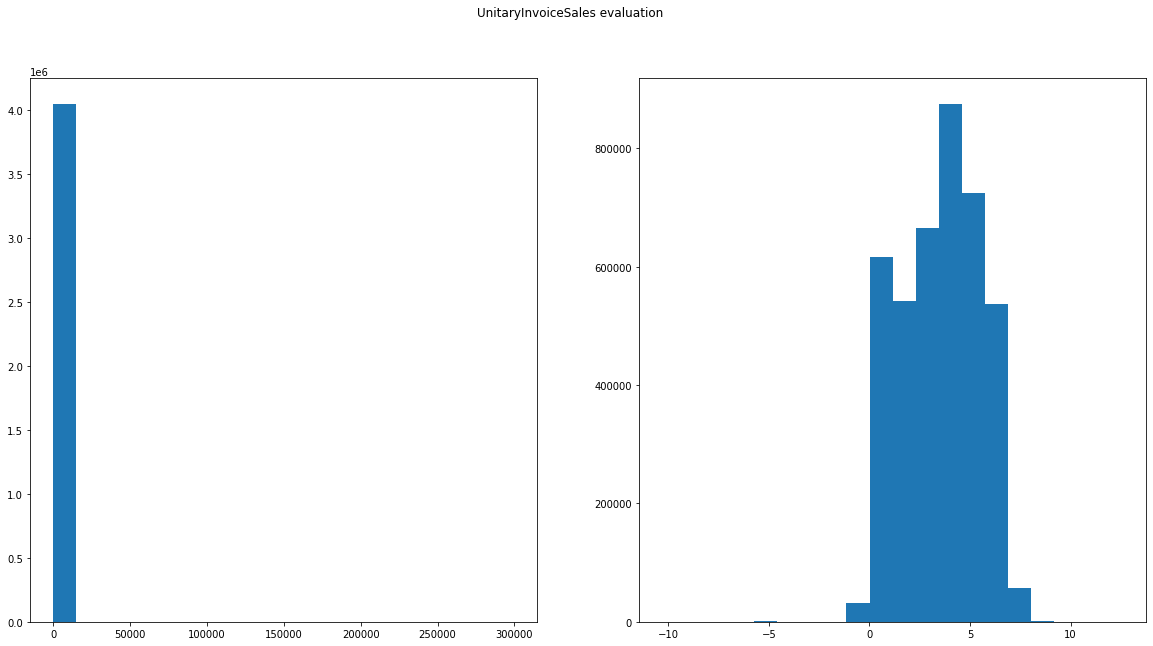

In [35]:
temporary_clean_full_dataset = (
    clean_full_dataset
    .query('SalesLabel == "Normal"')
    .assign(UnitaryInvoiceSales = lambda x: x['InvoiceSales'] / x['VolumeUnits'])
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10));
fig.suptitle('UnitaryInvoiceSales evaluation');
ax1.hist(temporary_clean_full_dataset['UnitaryInvoiceSales'], bins=20);
ax2.hist(np.log(temporary_clean_full_dataset['UnitaryInvoiceSales']), bins=20);

* *UnitaryInvoiceSales* is also right skewed, however when normalized using the logarithmic transformation a normal
distribution is achieved

`InventoryCost distribution`<br>
For this evaluation we focus only on the normal sales since they are the major part of the sales.

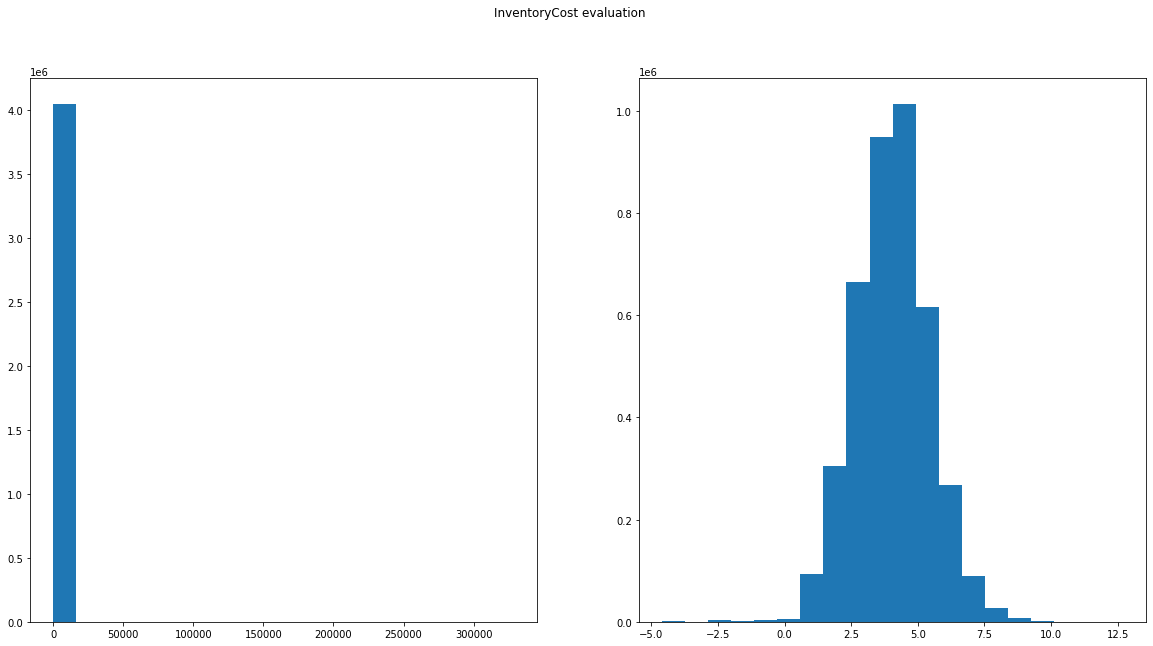

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10));
fig.suptitle('InventoryCost evaluation');
ax1.hist(clean_full_dataset.query('SalesLabel == "Normal"')['InventoryCost'], bins=20);
ax2.hist(np.log(clean_full_dataset.query('SalesLabel == "Normal"')['InventoryCost']), bins=20);

* *InventoryCost* is right skewed, however when normalized using the logarithmic transformation a normal distribution is
achieved

`IventoryCost unitary value distribution` <br>
For this evaluation we focus only on the normal sales since they are the major part of the sales. We also calculated
the unitary cost of each sale using the *InventoryCost* and the *VolumeUnits*.

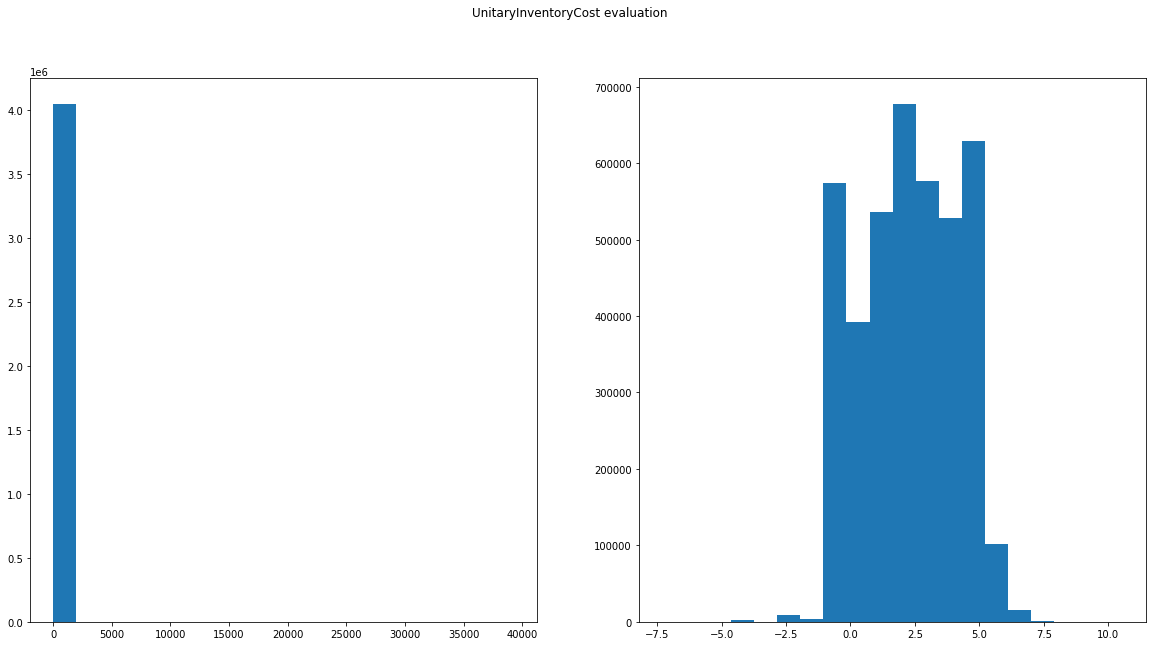

In [37]:
temporary_clean_full_dataset = (
    clean_full_dataset
    .query('SalesLabel == "Normal"')
    .assign(UnitaryInventoryCost = lambda x: x['InventoryCost'] / x['VolumeUnits'])
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('UnitaryInventoryCost evaluation')
ax1.hist(temporary_clean_full_dataset['UnitaryInventoryCost'], bins=20);
ax2.hist(np.log(temporary_clean_full_dataset['UnitaryInventoryCost']), bins=20);

* *UnitaryInventoryCost* is also right skewed, however when normalized using the logarithmic transformation a normal
distribution is achieved

`Comparing UnitaryInvoiceSales and UnitaryInventoryCost`<br>
For this evaluation we focus only on the normal sales since they are the major part of the sales. We compare the
UnitaryInvoiceSales and UnitaryInventoryCost, to evaluate all the possible combinations. Since we consider all these
sales *Normal* we expect that the InvoiceSales is always greater than the InventoryCost.

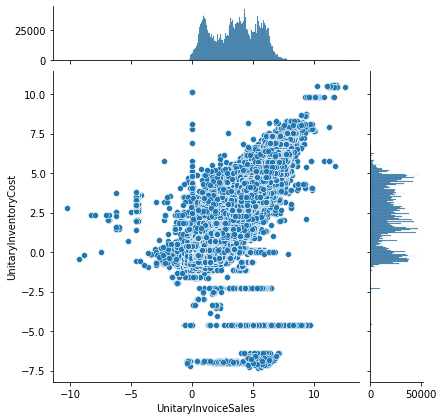

In [38]:
temporary_clean_full_dataset = (
    clean_full_dataset
    .query('SalesLabel == "Normal"')
    .assign(UnitaryInvoiceSales = lambda x: np.log(x['InvoiceSales'] / x['VolumeUnits']))
    .assign(UnitaryInventoryCost = lambda x: np.log(x['InventoryCost'] / x['VolumeUnits']))
)

g = sns.JointGrid(data=temporary_clean_full_dataset,
                  x="UnitaryInvoiceSales", y="UnitaryInventoryCost", marginal_ticks=True)
g.plot(sns.scatterplot, sns.histplot);

In [39]:
len(
    clean_full_dataset
    .query('SalesLabel == "Normal"')
    .loc[clean_full_dataset['InvoiceSales'] < clean_full_dataset['InventoryCost']]
)

152922

* There are 152.922 sales were the InventoryCost is bigger than the InvoiceSales. Currently, we have no information
regarding the reason this occurs. Could be the expected behaviour due to stocks that are kept in the company for a long
time or could be errors. So for now we will remove them from the analysis.

`VolumeUnits distribution`<br>
For this evaluation we focus only on the normal sales since they are the major part of the sales.

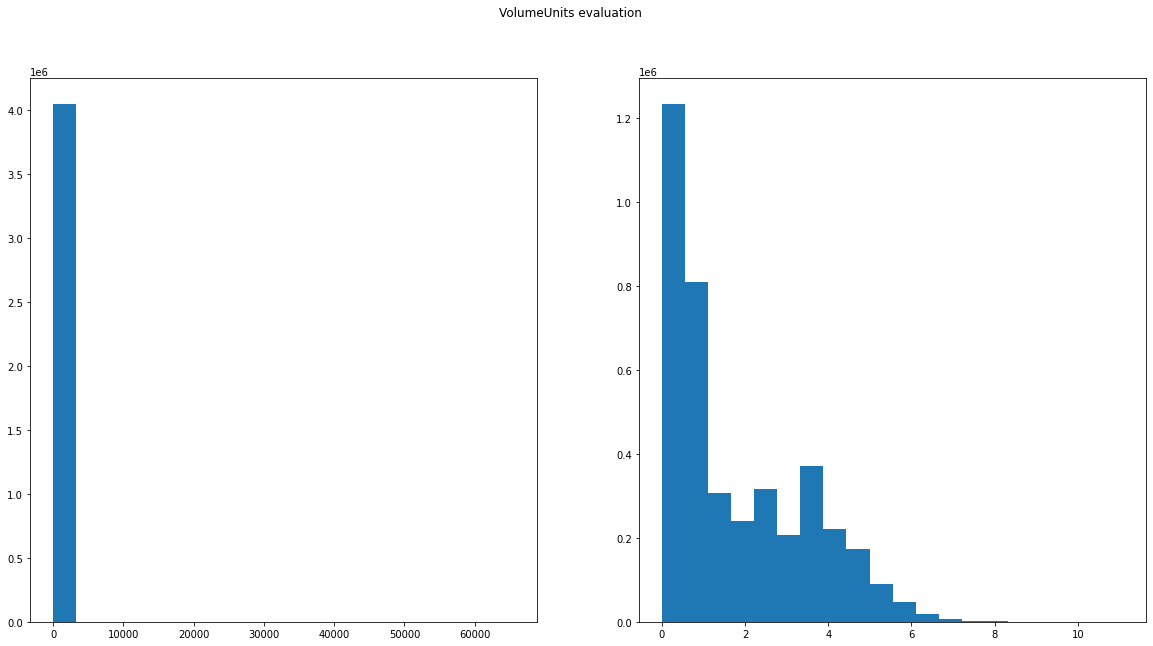

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10));
fig.suptitle('VolumeUnits evaluation');
ax1.hist(clean_full_dataset.query('SalesLabel == "Normal"')['VolumeUnits'], bins=20);
ax2.hist(np.log(clean_full_dataset.query('SalesLabel == "Normal"')['VolumeUnits']), bins=20);

* *VolumeUnits* is right skewed, however when normalized using the logarithmic transformation we get a more normal
distribution

**Full dataset visual exploration main points:**
1. Most of the sales are of the label *Normal* or *No info* (95 % of all the sales). *No info* sales should be removed
according to the company information and for that reason most of the sales are *Normal*. Since these sales are the
ones that better represent the clients interests/needs we will just keep these type of sales for the future steps.
2. *InvoiceSales*, *VolumeUnits* and *InventoryCost* are all right skewed and should be normalized using a log
transformation.
3. Sales where sale price is bigger than invoice cost should be removed.

<a name='final_dataset_preparation'></a>

#### 1.3.8. Final dataset preparation
After the previous evaluations we opted to focus on the *Normal* sales, since they represent most of the sales, and
because we assume that these are the ones that better represent the clients needs/wants.
We also decided to add three new features corresponding to the log transformation of *InvoiceSales*, *VolumeUnits* and
*InventoryCost*.

`Clean full dataset and save it`

In [41]:
full = FullData(clean_stock_dataset, clean_product_dataset)

clean_full_dataset = full.run()

clean_full_dataset.to_parquet("../../data/clean_datasets/clean_final_dataset.parquet")

12/09/2021 16:49:06 - INFO: Merging both datasets...
12/09/2021 16:49:11 - INFO: Removing missing values...
12/09/2021 16:49:18 - INFO: Labeling sales...
12/09/2021 16:49:27 - INFO: Correcting open sales date...
12/09/2021 16:49:27 - INFO: Selecting labels...
12/09/2021 16:49:29 - INFO: Adding year and month...
12/09/2021 16:49:30 - INFO: Adding unitary prices and costs...
12/09/2021 16:49:33 - INFO: Adding log transformations...
